In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
us = pd.read_excel('US-middle-20220915.xlsx')
us.set_index('DATE', inplace=True)
us.drop('USGG20YR ', axis = 1, inplace = True)

In [18]:
us.head(20)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
DATE,,,,,,,,
2013-01-01,0.01775,0.04310,0.11415,0.13955,0.24875,0.72370,1.75825,2.95030
2013-01-02,0.05325,0.05830,0.10905,0.13955,0.25685,0.76520,1.83795,3.04275
2013-01-03,0.05575,0.06845,0.11920,0.13955,0.26885,0.82130,1.91255,3.12595
2013-01-04,0.05325,0.06845,0.10905,0.13955,0.26550,0.80850,1.89995,3.09805
2013-01-07,0.03805,0.06335,0.10395,0.13445,0.26570,0.80860,1.89825,3.10105
2013-01-08,0.03295,0.05325,0.10395,0.13445,0.25395,0.78610,1.86915,3.06830
2013-01-09,0.03815,0.05830,0.08875,0.13445,0.24220,0.76680,1.85770,3.06080
2013-01-10,0.04325,0.06335,0.09385,0.13445,0.25030,0.79420,1.89670,3.08005
2013-01-11,0.04325,0.06845,0.09890,0.13445,0.25090,0.77970,1.86860,3.04830


In [7]:
rolling_US = us.assign(index = list(range(0,2531,1)))
rolling_US.set_index('index', inplace=True)

In [9]:
rolling_US.head(2550)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
index,,,,,,,,
0,0.01775,0.04310,0.11415,0.13955,0.24875,0.72370,1.75825,2.95030
1,0.05325,0.05830,0.10905,0.13955,0.25685,0.76520,1.83795,3.04275
2,0.05575,0.06845,0.11920,0.13955,0.26885,0.82130,1.91255,3.12595
3,0.05325,0.06845,0.10905,0.13955,0.26550,0.80850,1.89995,3.09805
4,0.03805,0.06335,0.10395,0.13445,0.26570,0.80860,1.89825,3.10105
...,...,...,...,...,...,...,...,...
2526,2.18450,3.00960,3.42880,3.58415,3.43400,3.35930,3.26540,3.41315
2527,2.18690,3.02350,3.46650,3.59455,3.50665,3.42265,3.31890,3.47680
2528,2.49150,3.03300,3.54420,3.63255,3.55960,3.43605,3.31255,3.44915


In [10]:
window = 20

In [11]:
MonthlyAverageValue = pd.DataFrame(np.zeros((rolling_US.shape[0] - window + 1, rolling_US.shape[1])))

In [12]:
def rolling_pca(window_data):
    roll_pca = PCA(copy = True, n_components=3)
    
    roll_pca.fit(rolling_US.loc[window_data, :]) #generate PCs
    
    roll_vals = roll_pca.transform(rolling_US.loc[window_data, :]) #reconstruct coefficients of PCs
    
    roll_reconstruct = roll_pca.inverse_transform(roll_vals) #reconstruct each value of each yield
    
    WindowAverageValue = np.average(roll_reconstruct, axis = 0) #take average of the reconstructed values in each window
    
    MonthlyAverageValue.iloc[int(window_data.index[0])] = WindowAverageValue
    
    return True

In [13]:
df_idx = pd.DataFrame(np.arange(rolling_US.shape[0]))

In [14]:
df_idx.rolling(window).apply(rolling_pca)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2526,1.0
2527,1.0
2528,1.0
2529,1.0


In [16]:
MonthlyAverageValue.head(2550)

,0,1,2,3,4,5,6,7
0,0.041985,0.067060,0.102957,0.137000,0.254005,0.779835,1.864795,3.057275
1,0.042238,0.068327,0.102958,0.137000,0.255537,0.787535,1.876882,3.068978
2,0.041730,0.068580,0.102957,0.136745,0.256077,0.793065,1.884630,3.075973
3,0.040845,0.068835,0.102705,0.136490,0.255823,0.795950,1.888292,3.078313
4,0.039323,0.068835,0.102450,0.136235,0.255737,0.799635,1.894085,3.084323
...,...,...,...,...,...,...,...,...
2507,2.231905,2.772780,3.216712,3.352885,3.350113,3.178345,3.048807,3.247525
2508,2.233682,2.796807,3.238565,3.370680,3.364417,3.200100,3.070283,3.262513
2509,2.251872,2.820885,3.262903,3.389475,3.380027,3.224050,3.094213,3.279375
2510,2.268025,2.845995,3.288023,3.411467,3.399440,3.251572,3.122762,3.299902


In [20]:
us2 = us.loc['2013-01-28':,:]

In [22]:
us2.head(2550)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
DATE,,,,,,,,
2013-01-28,0.02785,0.06335,0.10395,0.13955,0.27605,0.86295,1.96220,3.14140
2013-01-29,0.02280,0.06845,0.11415,0.13955,0.27940,0.87770,2.00000,3.18435
2013-01-30,0.04310,0.06335,0.10905,0.13445,0.26765,0.87580,1.99290,3.18265
2013-01-31,0.03805,0.07355,0.11415,0.13445,0.26375,0.87900,1.98580,3.17275
2013-02-01,0.02280,0.06845,0.10395,0.13445,0.26380,0.88220,2.01580,3.21825
...,...,...,...,...,...,...,...,...
2022-09-07,2.18450,3.00960,3.42880,3.58415,3.43400,3.35930,3.26540,3.41315
2022-09-08,2.18690,3.02350,3.46650,3.59455,3.50665,3.42265,3.31890,3.47680
2022-09-09,2.49150,3.03300,3.54420,3.63255,3.55960,3.43605,3.31255,3.44915


In [23]:
MonthlyAverageValue['DATE'] = us2.index
MonthlyAverageValue.set_index('DATE', inplace=True)
MonthlyAverageValue.columns=[us2.columns + 're']

In [24]:
MonthlyAverageValue.head(1000)

,USGG1Mre,USGG3Mre,USGG6M re,USGG12Mre,USGG2YRre,USGG5YRre,USGG10YRre,USGG30YRre
DATE,,,,,,,,
2013-01-28,0.041985,0.067060,0.102957,0.137000,0.254005,0.779835,1.864795,3.057275
2013-01-29,0.042238,0.068327,0.102958,0.137000,0.255537,0.787535,1.876882,3.068978
2013-01-30,0.041730,0.068580,0.102957,0.136745,0.256077,0.793065,1.884630,3.075973
2013-01-31,0.040845,0.068835,0.102705,0.136490,0.255823,0.795950,1.888292,3.078313
2013-02-01,0.039323,0.068835,0.102450,0.136235,0.255737,0.799635,1.894085,3.084323
...,...,...,...,...,...,...,...,...
2016-11-21,0.246745,0.396575,0.545678,0.685108,0.907542,1.456985,2.001205,2.752178
2016-11-22,0.248013,0.404195,0.552047,0.690485,0.919280,1.482083,2.029002,2.777232
2016-11-23,0.252578,0.412575,0.559437,0.696630,0.931997,1.508488,2.056838,2.801207


In [25]:
combo = pd.DataFrame()
combo = pd.concat([us2, MonthlyAverageValue], axis = 1)

In [26]:
combo.head()

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR,"(USGG1Mre,)","(USGG3Mre,)","(USGG6M re,)","(USGG12Mre,)","(USGG2YRre,)","(USGG5YRre,)","(USGG10YRre,)","(USGG30YRre,)"
DATE,,,,,,,,,,,,,,,,
2013-01-28,0.02785,0.06335,0.10395,0.13955,0.27605,0.86295,1.9622,3.14140,0.041985,0.067060,0.102957,0.137000,0.254005,0.779835,1.864795,3.057275
2013-01-29,0.02280,0.06845,0.11415,0.13955,0.27940,0.87770,2.0000,3.18435,0.042238,0.068327,0.102958,0.137000,0.255537,0.787535,1.876882,3.068978
2013-01-30,0.04310,0.06335,0.10905,0.13445,0.26765,0.87580,1.9929,3.18265,0.041730,0.068580,0.102957,0.136745,0.256077,0.793065,1.884630,3.075973
2013-01-31,0.03805,0.07355,0.11415,0.13445,0.26375,0.87900,1.9858,3.17275,0.040845,0.068835,0.102705,0.136490,0.255823,0.795950,1.888292,3.078313
2013-02-01,0.02280,0.06845,0.10395,0.13445,0.26380,0.88220,2.0158,3.21825,0.039323,0.068835,0.102450,0.136235,0.255737,0.799635,1.894085,3.084323


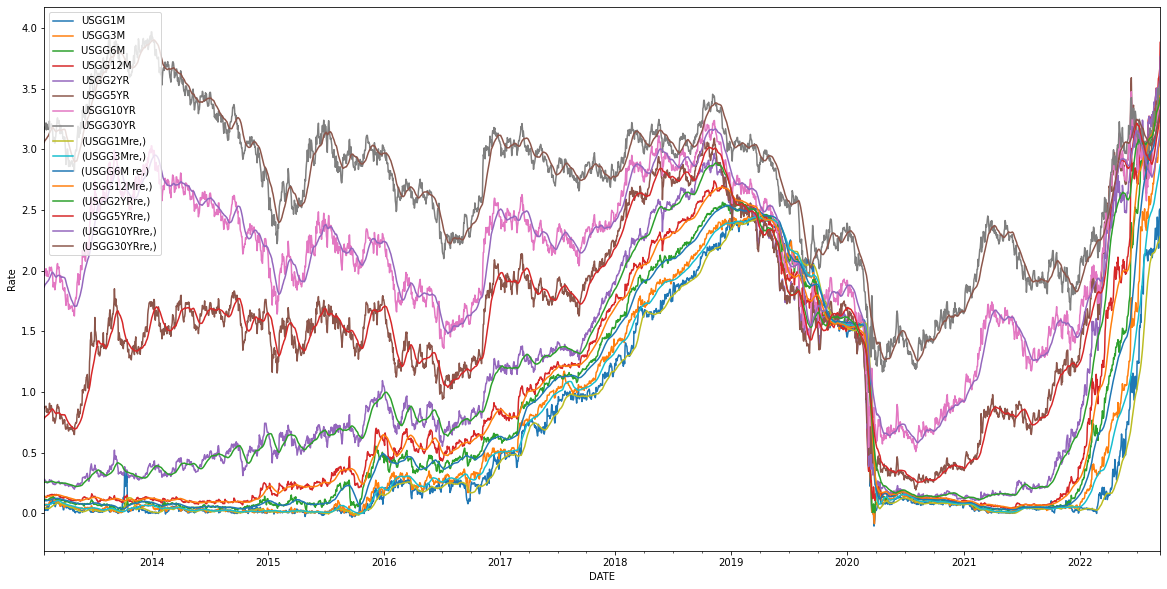

In [27]:
combo.plot(figsize=(20,10))
plt.ylabel('Rate')
plt.show()

In [29]:
combo.to_excel(excel_writer = 'us_daily.xlsx', sheet_name = 'us_daily')